In [1]:
!pip install -q keras

In [2]:
!pip install pyunpack

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf


import numpy as np

In [4]:
pip install efficientnet

     |████████████████████████████████| 50 kB 647 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np


In [6]:
import scipy.io as sio
import os
batch_size = 32
input_shape = (240,240)
train_dir = '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/train'
test_dir = '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/test'
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=20.,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=[0.9, 1.25],
        brightness_range=[0.5, 1.5],
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,
class_mode="categorical",
target_size=input_shape,
batch_size=batch_size)
validation_generator=test_datagen.flow_from_directory(test_dir,
class_mode="categorical",
target_size=input_shape,
batch_size=batch_size)


Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [7]:
import os
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
import keras
from keras.models import load_model
from keras.layers import Dropout, Dense, GlobalAveragePooling2D
from keras.optimizers import Adam


In [8]:
from keras.layers import BatchNormalization
from keras import optimizers
import efficientnet.keras as efn
from keras.preprocessing import image
from keras.layers import Input
from keras import backend as K
from keras.models import model_from_json
from keras.optimizers import Nadam
from keras.layers import Dropout
from keras.layers.convolutional import AveragePooling2D

base_model = efn.EfficientNetB3(weights='imagenet', include_top=False)
#add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64,activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(128,activation='relu')(x)
x=BatchNormalization()(x)
predictions = Dense(196,activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam',
loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

44113920/44107200 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, None, None, 4 1080        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, None, None, 4 160         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, None, None, 4 0           stem_bn[0][0]                    
_____________________________

In [9]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.samples // batch_size + 1 ,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size + 1,
                    epochs=44,
                    verbose=1)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/44
255/255 [==============================] - 386s 1s/step - loss: 5.4769 - accuracy: 0.0108 - val_loss: 6.0013 - val_accuracy: 0.0111
Epoch 2/44
255/255 [==============================] - 271s 1s/step - loss: 5.0018 - accuracy: 0.0138 - val_loss: 4.5464 - val_accuracy: 0.0464
Epoch 3/44
255/255 [==============================] - 270s 1s/step - loss: 4.4713 - accuracy: 0.0464 - val_loss: 3.8690 - val_accuracy: 0.0853
Epoch 4/44
255/255 [==============================] - 270s 1s/step - loss: 3.9238 - accuracy: 0.0870 - val_loss: 3.3079 - val_accuracy: 0.1607
Epoch 5/44
255/255 [==============================] - 271s 1s/step - loss: 3.4513 - accuracy: 0.1382 - val_loss: 3.1647 - val_accuracy: 0.1899
Epoch 6/44
255/255 [==============================] - 272s 1s/step - loss: 3.0269 - accuracy: 0.2014 - val_loss: 2.4945 - val_accuracy: 0.3008
Epoch 7/44
255/255 [==============================] - 269s 1s/step - loss: 2.6966 - accuracy: 0.2629 - val_loss: 2.0841 - val_accuracy: 0.3987

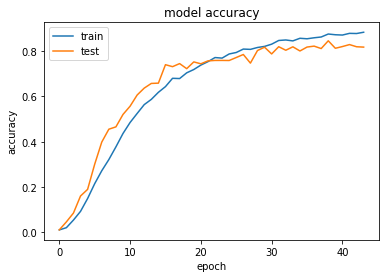

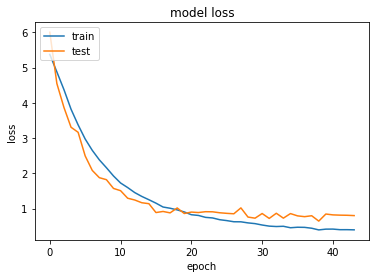

In [10]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:

batch_size = 32
train_generator=train_datagen.flow_from_directory(train_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size)


validation_generator=test_datagen.flow_from_directory(test_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size)


for layer in model.layers:
    layer.trainable = True
    
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [12]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.samples // batch_size + 1 ,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size + 1,
                    epochs=24,                           
                                
                    verbose=1)

Epoch 1/24
255/255 [==============================] - 280s 1s/step - loss: 0.3325 - accuracy: 0.9031 - val_loss: 0.5643 - val_accuracy: 0.8708
Epoch 2/24
255/255 [==============================] - 268s 1s/step - loss: 0.2836 - accuracy: 0.9132 - val_loss: 0.5346 - val_accuracy: 0.8749
Epoch 3/24
255/255 [==============================] - 267s 1s/step - loss: 0.2581 - accuracy: 0.9202 - val_loss: 0.5224 - val_accuracy: 0.8768
Epoch 4/24
255/255 [==============================] - 268s 1s/step - loss: 0.2359 - accuracy: 0.9285 - val_loss: 0.5063 - val_accuracy: 0.8797
Epoch 5/24
255/255 [==============================] - 281s 1s/step - loss: 0.2168 - accuracy: 0.9340 - val_loss: 0.5011 - val_accuracy: 0.8822
Epoch 6/24
255/255 [==============================] - 280s 1s/step - loss: 0.2154 - accuracy: 0.9357 - val_loss: 0.4939 - val_accuracy: 0.8830
Epoch 7/24
255/255 [==============================] - 269s 1s/step - loss: 0.1917 - accuracy: 0.9413 - val_loss: 0.4883 - val_accuracy: 0.8843

In [16]:
model.save('Efficientnet_model.h5')

In [18]:
from keras.models import load_model

In [20]:
new_model=load_model('Efficientnet_model.h5')

In [21]:
loss,acc=new_model.evaluate(validation_generator)
print(acc)

252/252 [==============================] - 71s 274ms/step - loss: 0.4617 - accuracy: 0.8942
0.8941673636436462


In [22]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size,shuffle=False)


validation_generator=test_datagen.flow_from_directory(test_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size,shuffle=False) 

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [24]:
Y_pred = model.predict_generator(validation_generator, validation_generator.samples  // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')

print(classification_report(validation_generator.classes, y_pred))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[43  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  0 41  0]
 [ 0  0  0 ...  1  0 36]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        44
           1       0.90      0.98      0.93        44
           2       0.82      0.84      0.83        32
           3       0.87      0.95      0.91        43
           4       0.97      0.93      0.95        42
           5       0.97      0.82      0.89        40
           6       0.85      0.90      0.88        39
           7       0.70      0.84      0.77        45
           8       0.80      0.68      0.74        41
           9       0.90      0.79      0.84        33
          10       0.89      0.87      0.88        38
          11       0.61      0.70      0.65        40
          12       0.70      0.71      0.71        42
          13       0.75      0.88      0.81     

In [25]:
cm=confusion_matrix(validation_generator.classes, y_pred)

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    # tick_marks = np.arange(len(classes))
    # plt.xticks(tick_marks, classes, rotation=45)
    # plt.yticks(tick_marks, classes)

    # fmt = '.2f' if normalize else 'd'
    # thresh = cm.max() / 2.
    # for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #     plt.text(j, i, format(cm[i, j], fmt),
    #              horizontalalignment="center",
    #              color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
category_names = sorted(os.listdir('../input/stanford-car-dataset-by-classes-folder/car_data/car_data/test'))

Normalized confusion matrix
[[0.97727273 0.         0.         ... 0.         0.         0.        ]
 [0.         0.97727273 0.         ... 0.         0.         0.        ]
 [0.         0.         0.84375    ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.90243902 0.         0.        ]
 [0.         0.         0.         ... 0.         0.95348837 0.        ]
 [0.         0.         0.         ... 0.025      0.         0.9       ]]


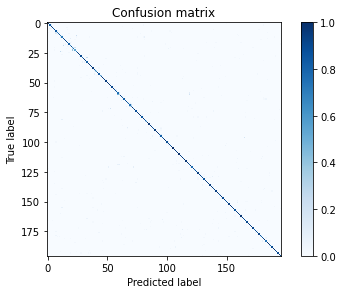

In [28]:
plot_confusion_matrix(cm, category_names,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
